.

# Detection and Prevention of Vehicle Insurance Claim Fraud

### Muhammad Haris, Aaron Ramirez, and Outhai Xayavongsa

In [126]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew, kurtosis, chi2_contingency, ttest_ind, norm, probplot

In [30]:
# Load the Dataset
file = 'fraud_oracle.csv'
df = pd.read_csv(file)

# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows of the dataset
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [12]:
# Descriptive Statistics
df.describe(include='all')

Month   WeekOfMonth DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
count   15420  15420.000000     15420    15420        15420            15420   
unique     12           NaN         7       19            2                8   
top       Jan           NaN    Monday  Pontiac        Urban           Monday   
freq     1411           NaN      2616     3837        13822             3757   
mean      NaN      2.788586       NaN      NaN          NaN              NaN   
std       NaN      1.287585       NaN      NaN          NaN              NaN   
min       NaN      1.000000       NaN      NaN          NaN              NaN   
25%       NaN      2.000000       NaN      NaN          NaN              NaN   
50%       NaN      3.000000       NaN      NaN          NaN              NaN   
75%       NaN      4.000000       NaN      NaN          NaN              NaN   
max       NaN      5.000000       NaN      NaN          NaN              NaN   

       MonthClaimed  WeekOfMonthClaimed    Sex MaritalStatus           Age  \
count         15420        15420.000000  15420         15420  15420.000000   
unique           13                 NaN      2             4           NaN   
top             Jan                 NaN   Male       Married           NaN   
freq           1446                 NaN  13000         10625           NaN   
mean            NaN            2.693969    NaN           NaN     39.855707   
std             NaN            1.259115    NaN           NaN     13.492377   
min             NaN            1.000000    NaN           NaN      0.000000   
25%             NaN            2.000000    NaN           NaN     31.000000   
50%             NaN            3.000000    NaN           NaN     38.000000   
75%             NaN            4.000000    NaN           NaN     48.000000   
max             NaN            5.000000    NaN           NaN     80.000000   

                Fault         PolicyType VehicleCategory    VehiclePrice  \
count           15420              15420           15420           15420   
unique              2                  9               3               6   
top     Policy Holder  Sedan - Collision           Sedan  20000 to 29000   
freq            11230               5584            9671            8079   
mean              NaN                NaN             NaN             NaN   
std               NaN                NaN             NaN             NaN   
min               NaN                NaN             NaN             NaN   
25%               NaN                NaN             NaN             NaN   
50%               NaN                NaN             NaN             NaN   
75%               NaN                NaN             NaN             NaN   
max               NaN                NaN             NaN             NaN   

        FraudFound_P  PolicyNumber     RepNumber    Deductible  DriverRating  \
count   15420.000000  15420.000000  15420.000000  15420.000000  15420.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.059857   7710.500000      8.483268    407.704280      2.487808   
std         0.237230   4451.514911      4.599948     43.950998      1.119453   
min         0.000000      1.000000      1.000000    300.000000      1.000000   
25%         0.000000   3855.750000      5.000000    400.000000      1.000000   
50%         0.000000   7710.500000      8.000000    400.000000      2.000000   
75%         0.000000  11565.250000     12.000000    400.000000      3.000000   
max         1.000000  15420.000000     16.000000    700.000000      4.000000   

       Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims AgeOfVehicle  \
count                 15420             15420              15420        15420   
unique                    5                 4                  4          

## Data Cleaning

In [13]:
# Check Missing Values
print("Missing Values in each column:")
df.isna().sum()

Missing Values in each column:


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [14]:
# Check data types
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [130]:
# Convert 'FraudFound_P' to boolean and 'Year' to object
df['FraudFound_P'] = df['FraudFound_P'].astype(bool)
df['Year'] = df['Year'].astype(object)

#print(df['FraudFound_P'].dtypes)
#print(df['Year'].dtypes)

# Extract numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [131]:
# Explicitly convert categorical columns to category dtype
df[categorical_cols] = df[categorical_cols].astype('category')

In [132]:
# Convert numerical columns to the correct dtype
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [25]:
# Display the first few rows again to confirm changes
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000         False   
1  Sport - Collision           Sport  more than 69000         False   
2  Sport - Collision           Sport  more than 69000         False   
3  Sedan - Liability           Sport   20000 to 29000         False   
4  Sport - Collision           Sport  more than 69000         False   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [26]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
#df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))
#df_encoded = df_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

# Print first few rows of encoded and scaled dataset
df_encoded.head()

WeekOfMonth  WeekOfMonthClaimed  Age  FraudFound_P  PolicyNumber  \
0            5                   1   21         False             1   
1            3                   4   34         False             2   
2            5                   2   47         False             3   
3            2                   1   65         False             4   
4            5                   2   27         False             5   

   RepNumber  Deductible  DriverRating  Month_Aug  Month_Dec  Month_Feb  \
0         12         300             1          0          1          0   
1         15         400             4          0          0          0   
2          7         400             3          0          0          0   
3          4         400             2          0          0          0   
4          3         400             1          0          0          0   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          1          0          0          0          0          0   

   Month_Oct  Month_Sep  DayOfWeek_Monday  DayOfWeek_Saturday  \
0          0          0                 0                   0   
1          0          0                 0                   0   
2          1          0                 0                   0   
3          0          0                 0                   1   
4          0          0                 1                   0   

   DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  0   
3                 0                   0                  0   
4                 0                   0                  0   

   DayOfWeek_Wednesday  Make_BMW  Make_Chevrolet  Make_Dodge  Make_Ferrari  \
0                    1         0               0           0             0   
1                    1         0               0           0             0   
2                    0         0               0           0             0   
3                    0         0               0           0             0   
4                    0         0               0           0             0   

   Make_Ford  Make_Honda  Make_Jaguar  Make_Lexus  Make_Mazda  Make_Mecedes  \
0          0           1            0           0           0             0   
1          0           1            0           0           0             0   
2          0           1            0           0           0             0   
3          0           0            0           0           0             0   
4          0           1            0           0           0             0   

   Make_Mercury  Make_Nisson  Make_Pontiac  Make_Porche  Make_Saab  \
0             0            0             0            0          0   
1             0            0             0            0          0   
2             0            0             0            0          0   
3             0            0             0            0          0   
4             0            0             0            0          0   

   Make_Saturn  Make_Toyota  Make_VW  AccidentArea_Urban  \
0            0            0        0                   1   
1            0            0        0                   1   
2            0            0        0                   1   
3            0            1        0                   0   
4            0            0        0                   1   

   DayOfWeekClaimed_Friday  DayOfWeekClaimed_Monday  \
0                        0                        0   
1                        0                        1   
2                        0                 

In [28]:
# Scale numerical columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display the first few rows of the encoded and scaled dataset
df_encoded.head()

#coding note. If the car has 0 for 1995 and 1996, it is considered 1994

WeekOfMonth  WeekOfMonthClaimed       Age  FraudFound_P  PolicyNumber  \
0     1.717545           -1.345408 -1.397554         False     -1.731938   
1     0.164199            1.037295 -0.434015         False     -1.731714   
2     1.717545           -0.551174  0.529523         False     -1.731489   
3    -0.612473           -1.345408  1.863653         False     -1.731265   
4     1.717545           -0.551174 -0.952844         False     -1.731040   

   RepNumber  Deductible  DriverRating  Month_Aug  Month_Dec  Month_Feb  \
0   0.764540   -2.450633     -1.329092          0          1          0   
1   1.416743   -0.175298      1.350875          0          0          0   
2  -0.322464   -0.175298      0.457553          0          0          0   
3  -0.974666   -0.175298     -0.435770          0          0          0   
4  -1.192067   -0.175298     -1.329092          0          0          0   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          1          0          0          0          0          0   

   Month_Oct  Month_Sep  DayOfWeek_Monday  DayOfWeek_Saturday  \
0          0          0                 0                   0   
1          0          0                 0                   0   
2          1          0                 0                   0   
3          0          0                 0                   1   
4          0          0                 1                   0   

   DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  0   
3                 0                   0                  0   
4                 0                   0                  0   

   DayOfWeek_Wednesday  Make_BMW  Make_Chevrolet  Make_Dodge  Make_Ferrari  \
0                    1         0               0           0             0   
1                    1         0               0           0             0   
2                    0         0               0           0             0   
3                    0         0               0           0             0   
4                    0         0               0           0             0   

   Make_Ford  Make_Honda  Make_Jaguar  Make_Lexus  Make_Mazda  Make_Mecedes  \
0          0           1            0           0           0             0   
1          0           1            0           0           0             0   
2          0           1            0           0           0             0   
3          0           0            0           0           0             0   
4          0           1            0           0           0             0   

   Make_Mercury  Make_Nisson  Make_Pontiac  Make_Porche  Make_Saab  \
0             0            0             0            0          0   
1             0            0             0            0          0   
2             0            0             0            0          0   
3             0            0             0            0          0   
4             0            0             0            0          0   

   Make_Saturn  Make_Toyota  Make_VW  AccidentArea_Urban  \
0            0            0        0                   1   
1            0            0        0                   1   
2            0            0        0                   1   
3            0            1        0                   0   
4            0            0        0                   1   

   DayOfWeekClaimed_Friday  DayOfWeekClaimed_Monday  \
0                        0                        0   
1                        0                        1   
2            

In [29]:
# Extract the target column
target_col = df_encoded['FraudFound_P'].copy()

#target_col.head()

## Exploratory Data Analysis

### Univariate Analysis

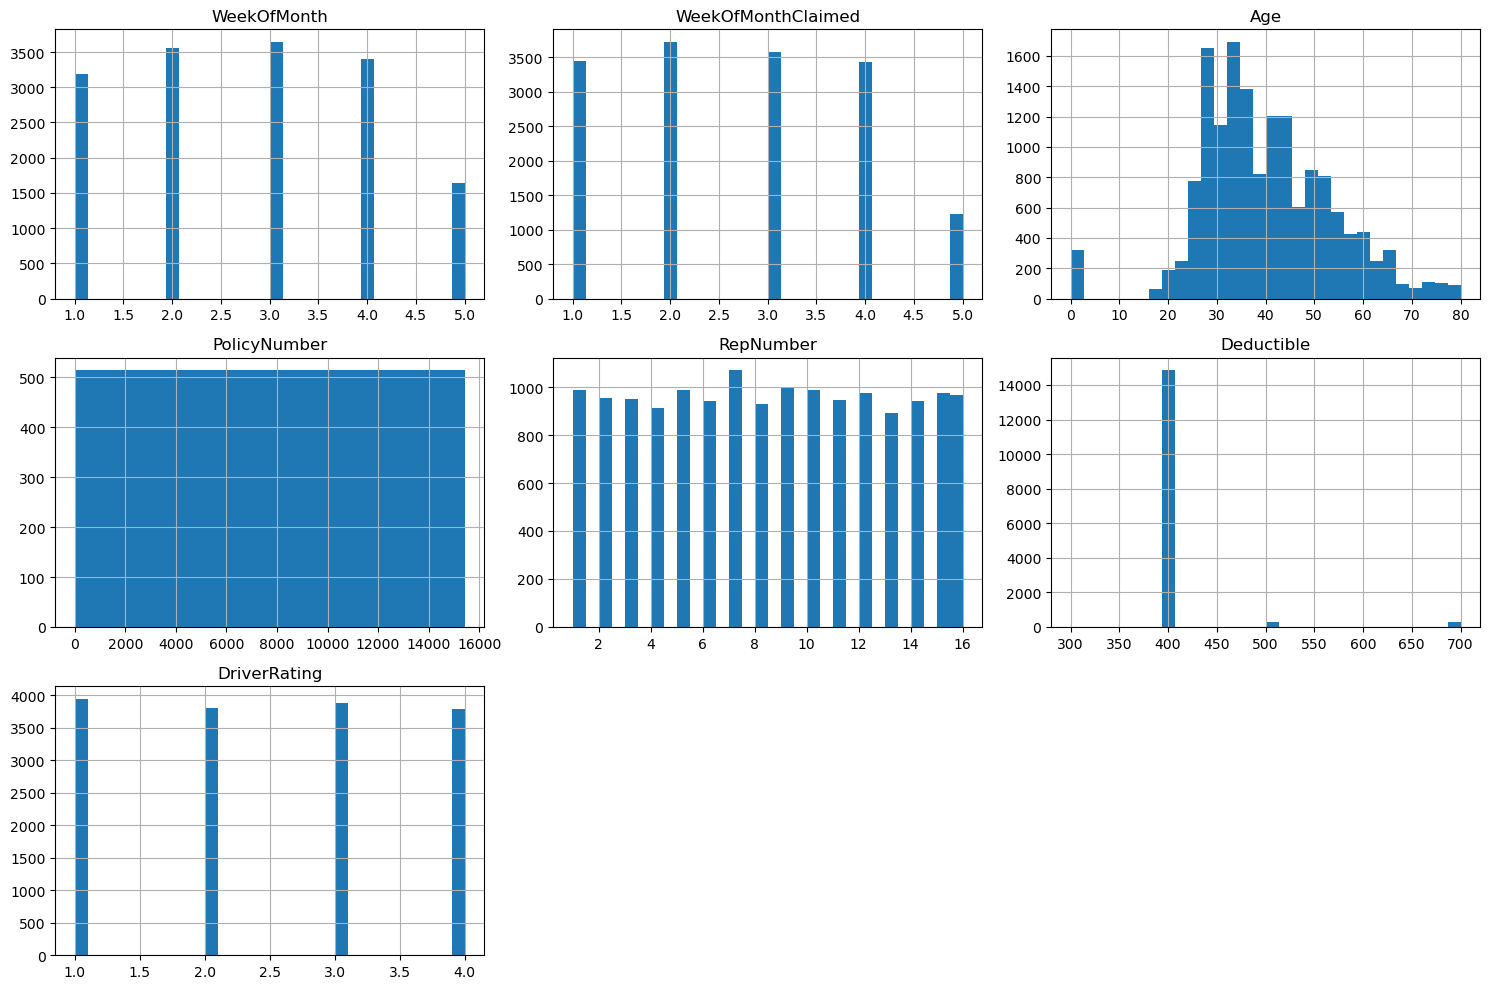

In [164]:
# Histograms for numerical variables
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**The histograms provide an overview of the distribution of several variables within the dataset. Key observations include the following: the majority of claims were reported during the first and fourth weeks of the month, and a significant number of claims were made by policyholders aged 30-40 years. Fraudulent claims ('FraudFound_P') are relatively rare compared to non-fraudulent ones. 'PolicyNumber' appears uniformly distributed, while 'Deductible' mostly clusters around the lower end with a few higher outliers. These patterns might indicate specific trends and anomalies related to the fraudulent claims, which are critical for detecting fraud.**

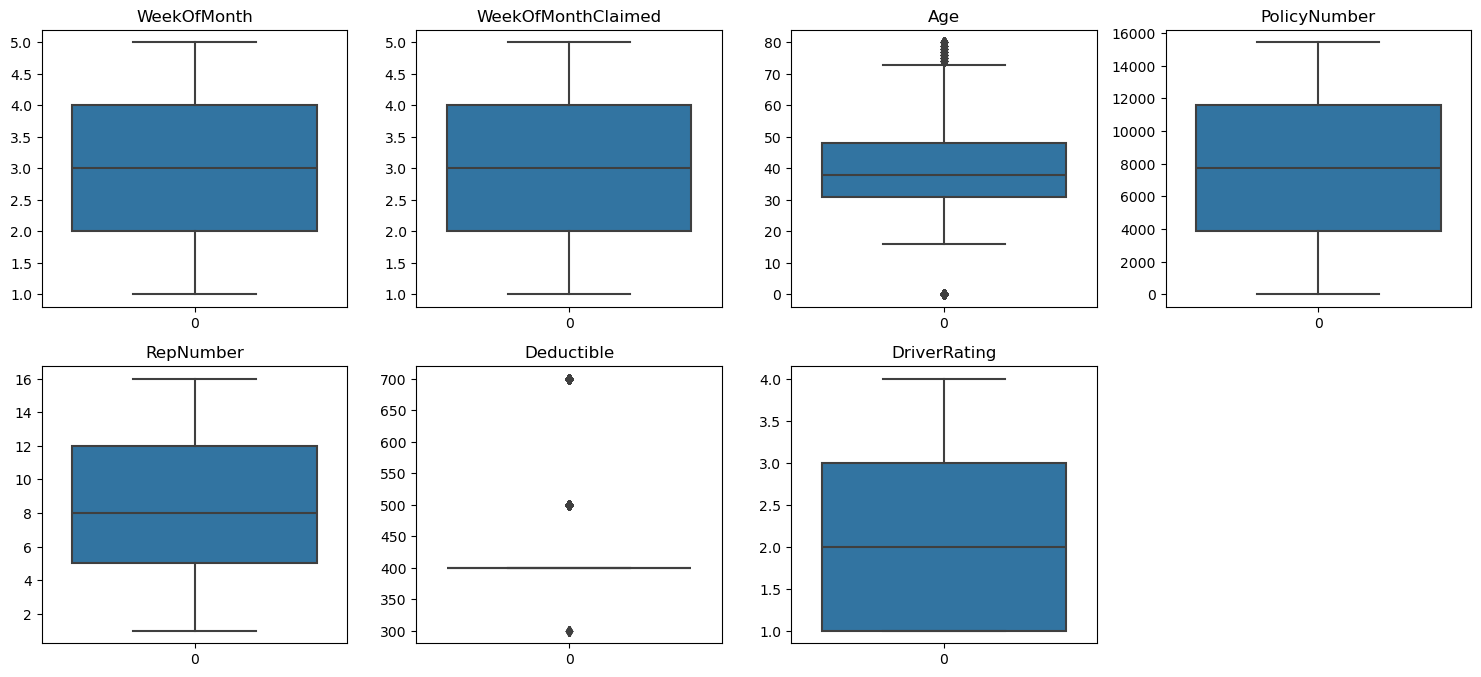

In [133]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

**The box plots provide a comprehensive view of the distributions for several variables in relation to the fraud indicator. While most variables exhibit consistent medians and interquartile ranges, indicating little variance between fraudulent and non-fraudulent claims, notable outliers in 'Age' and 'Deductible' suggest some potential areas for further investigation. These outliers in 'Age' and 'Deductible' might align with the problem statement, indicating that certain age groups and deductible amounts could be more prone to fraud, thus warranting closer examination in the fraud detection process.**

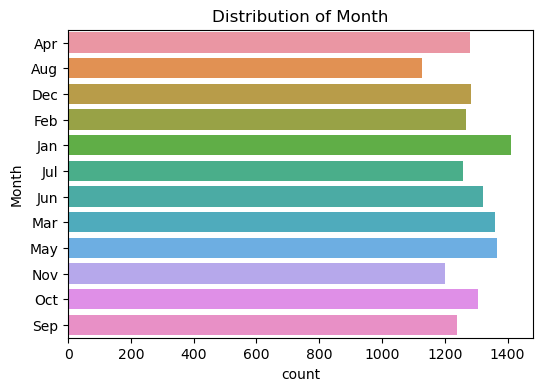

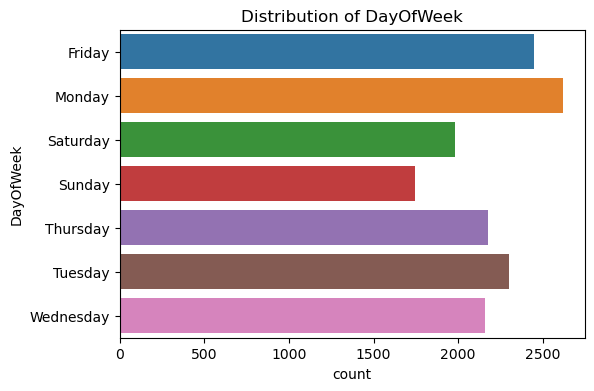

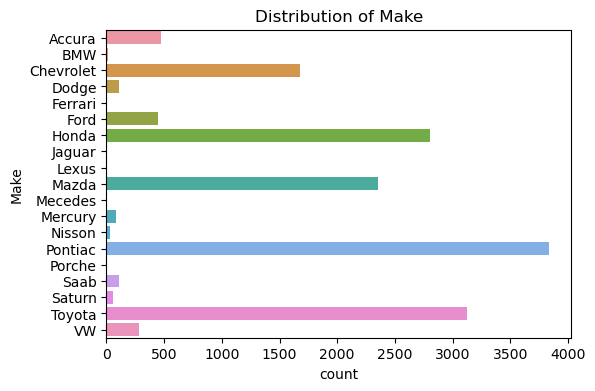

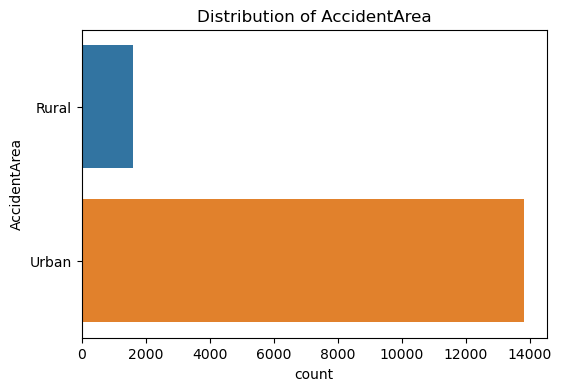

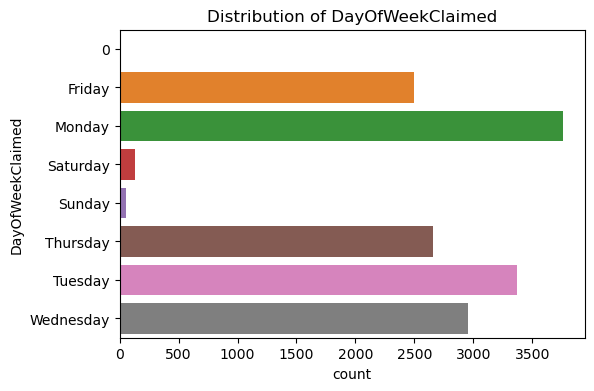

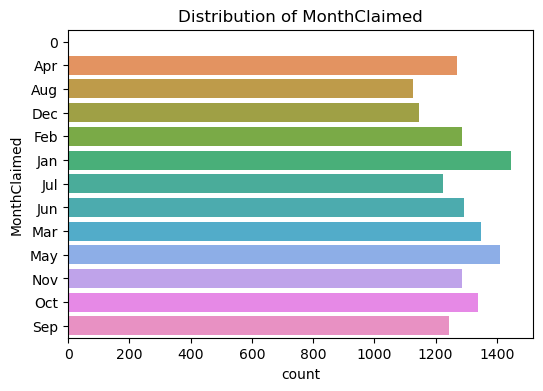

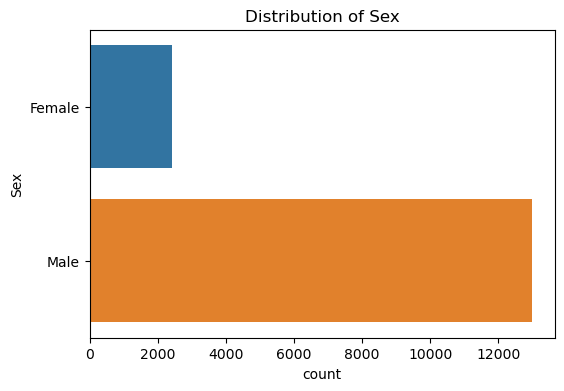

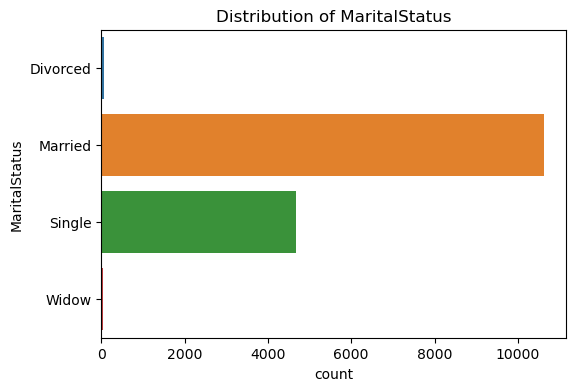

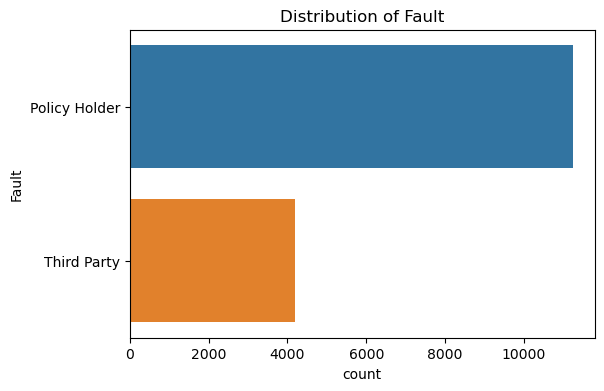

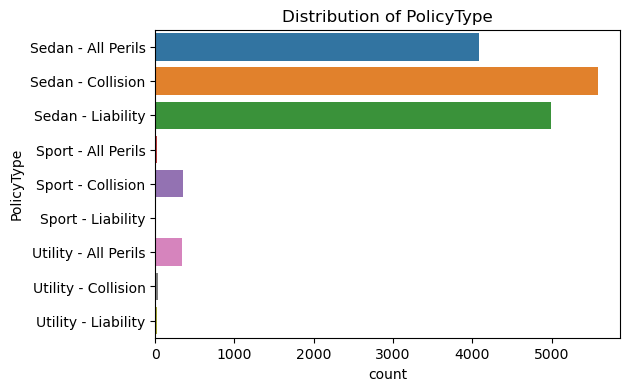

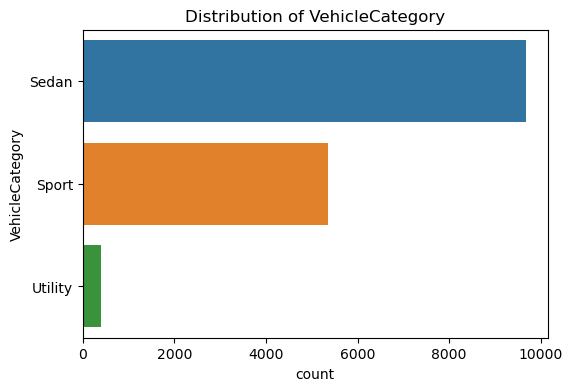

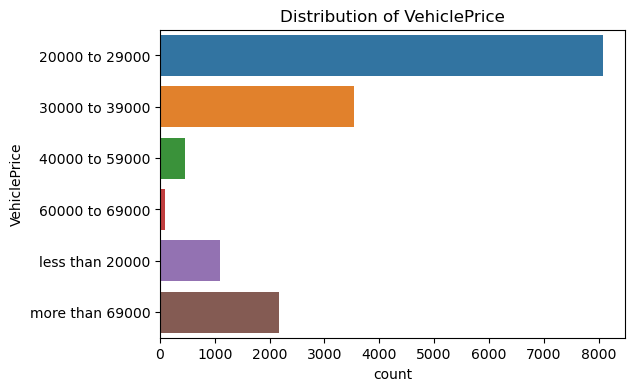

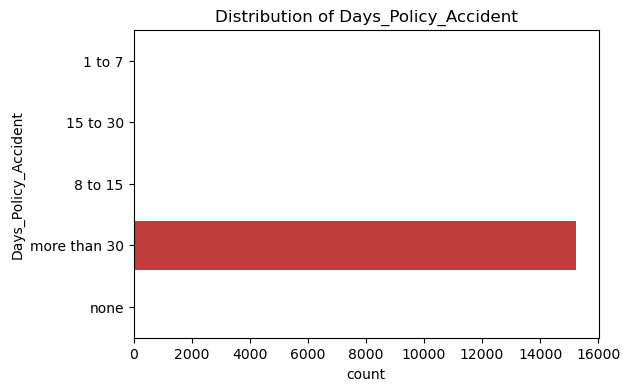

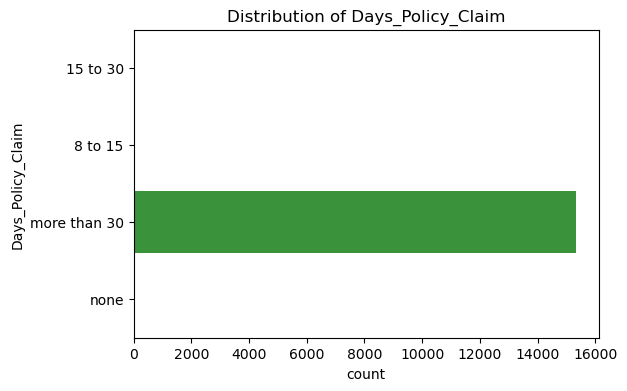

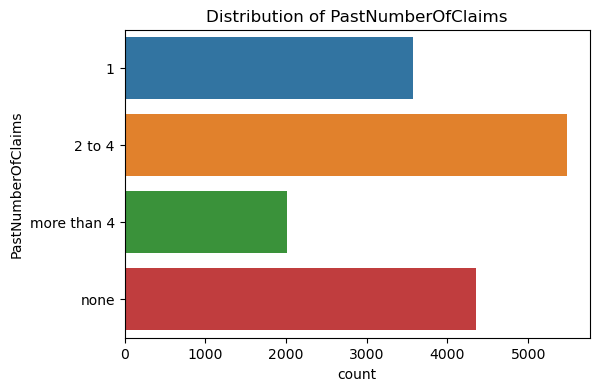

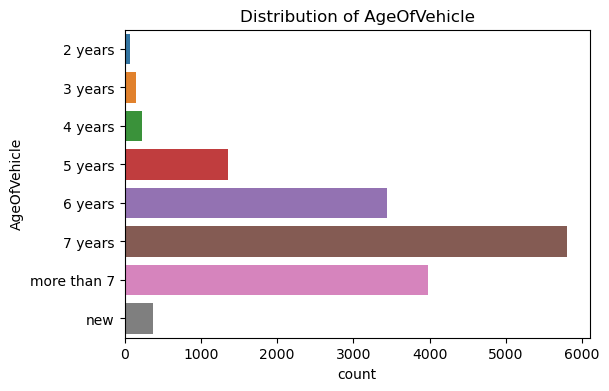

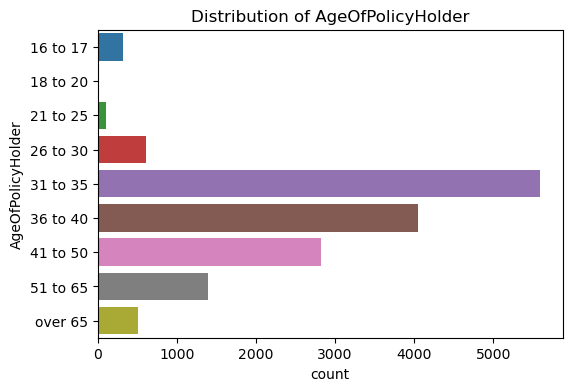

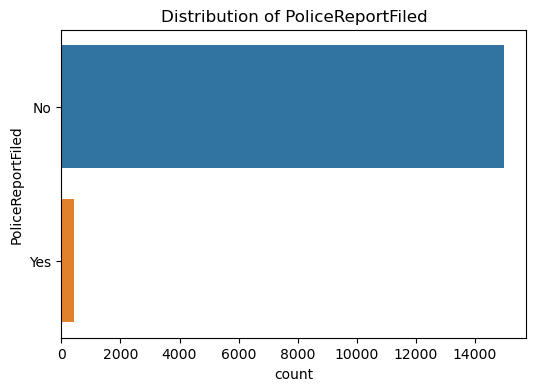

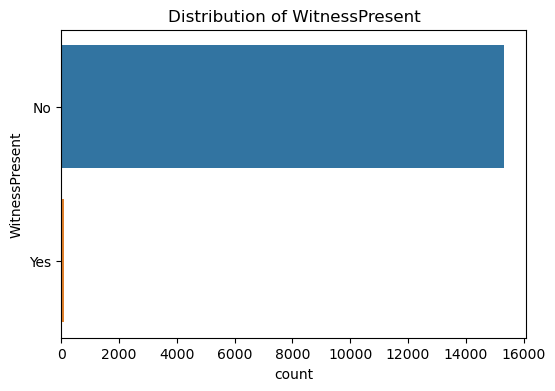

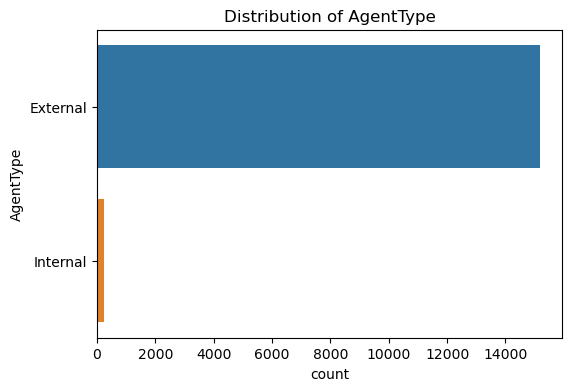

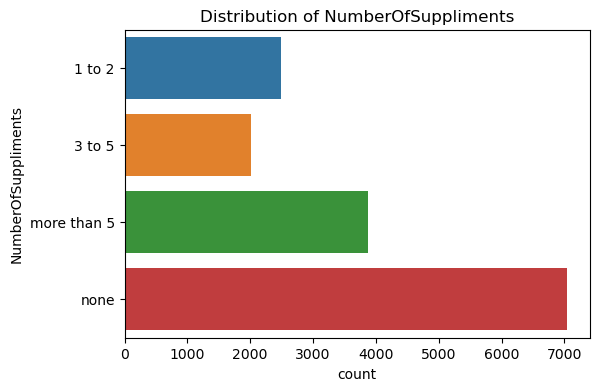

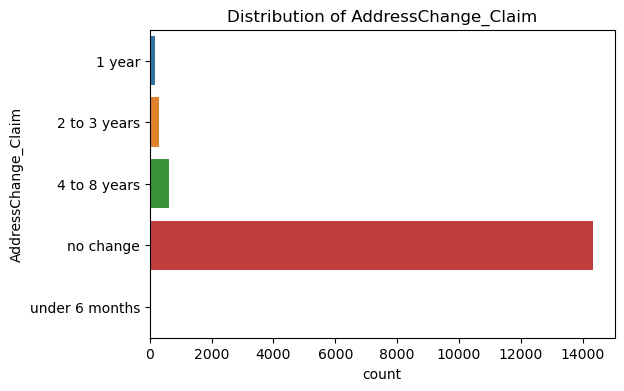

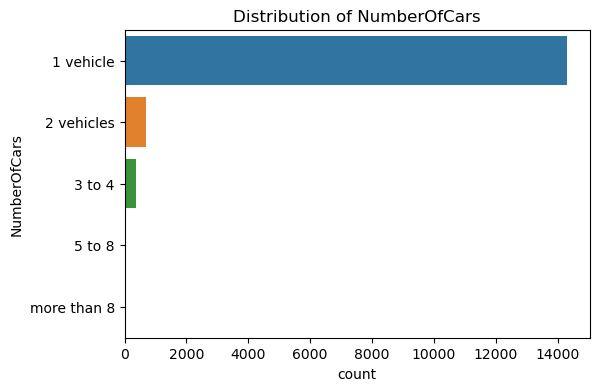

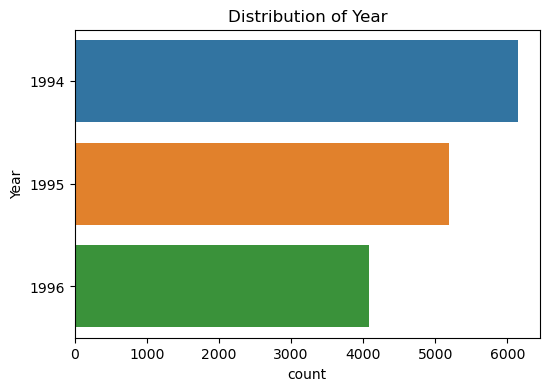

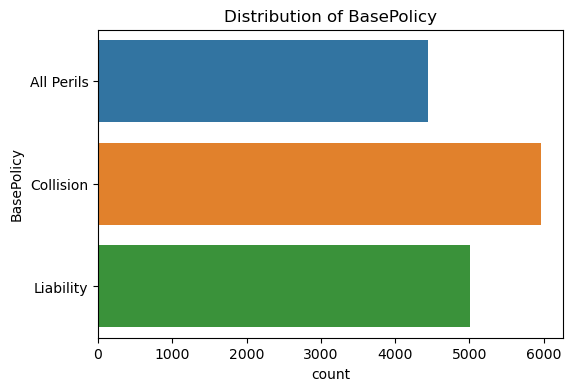

In [134]:
# Countplots for Categorical Variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

**The box plots provide a visual summary of the distribution and variability of different variables in relation to fraudulent claims. Notably, 'Age' and 'PolicyNumber' show slight differences in medians and distributions between fraudulent and non-fraudulent claims, while 'Deductible' remains consistent across both categories. This suggests that certain factors such as age and policy number might have subtle influences on the likelihood of a claim being fraudulent, potentially aligning with the problem statement's aim to identify patterns that could predict fraudulent claims.**

### Bivariate Analysis

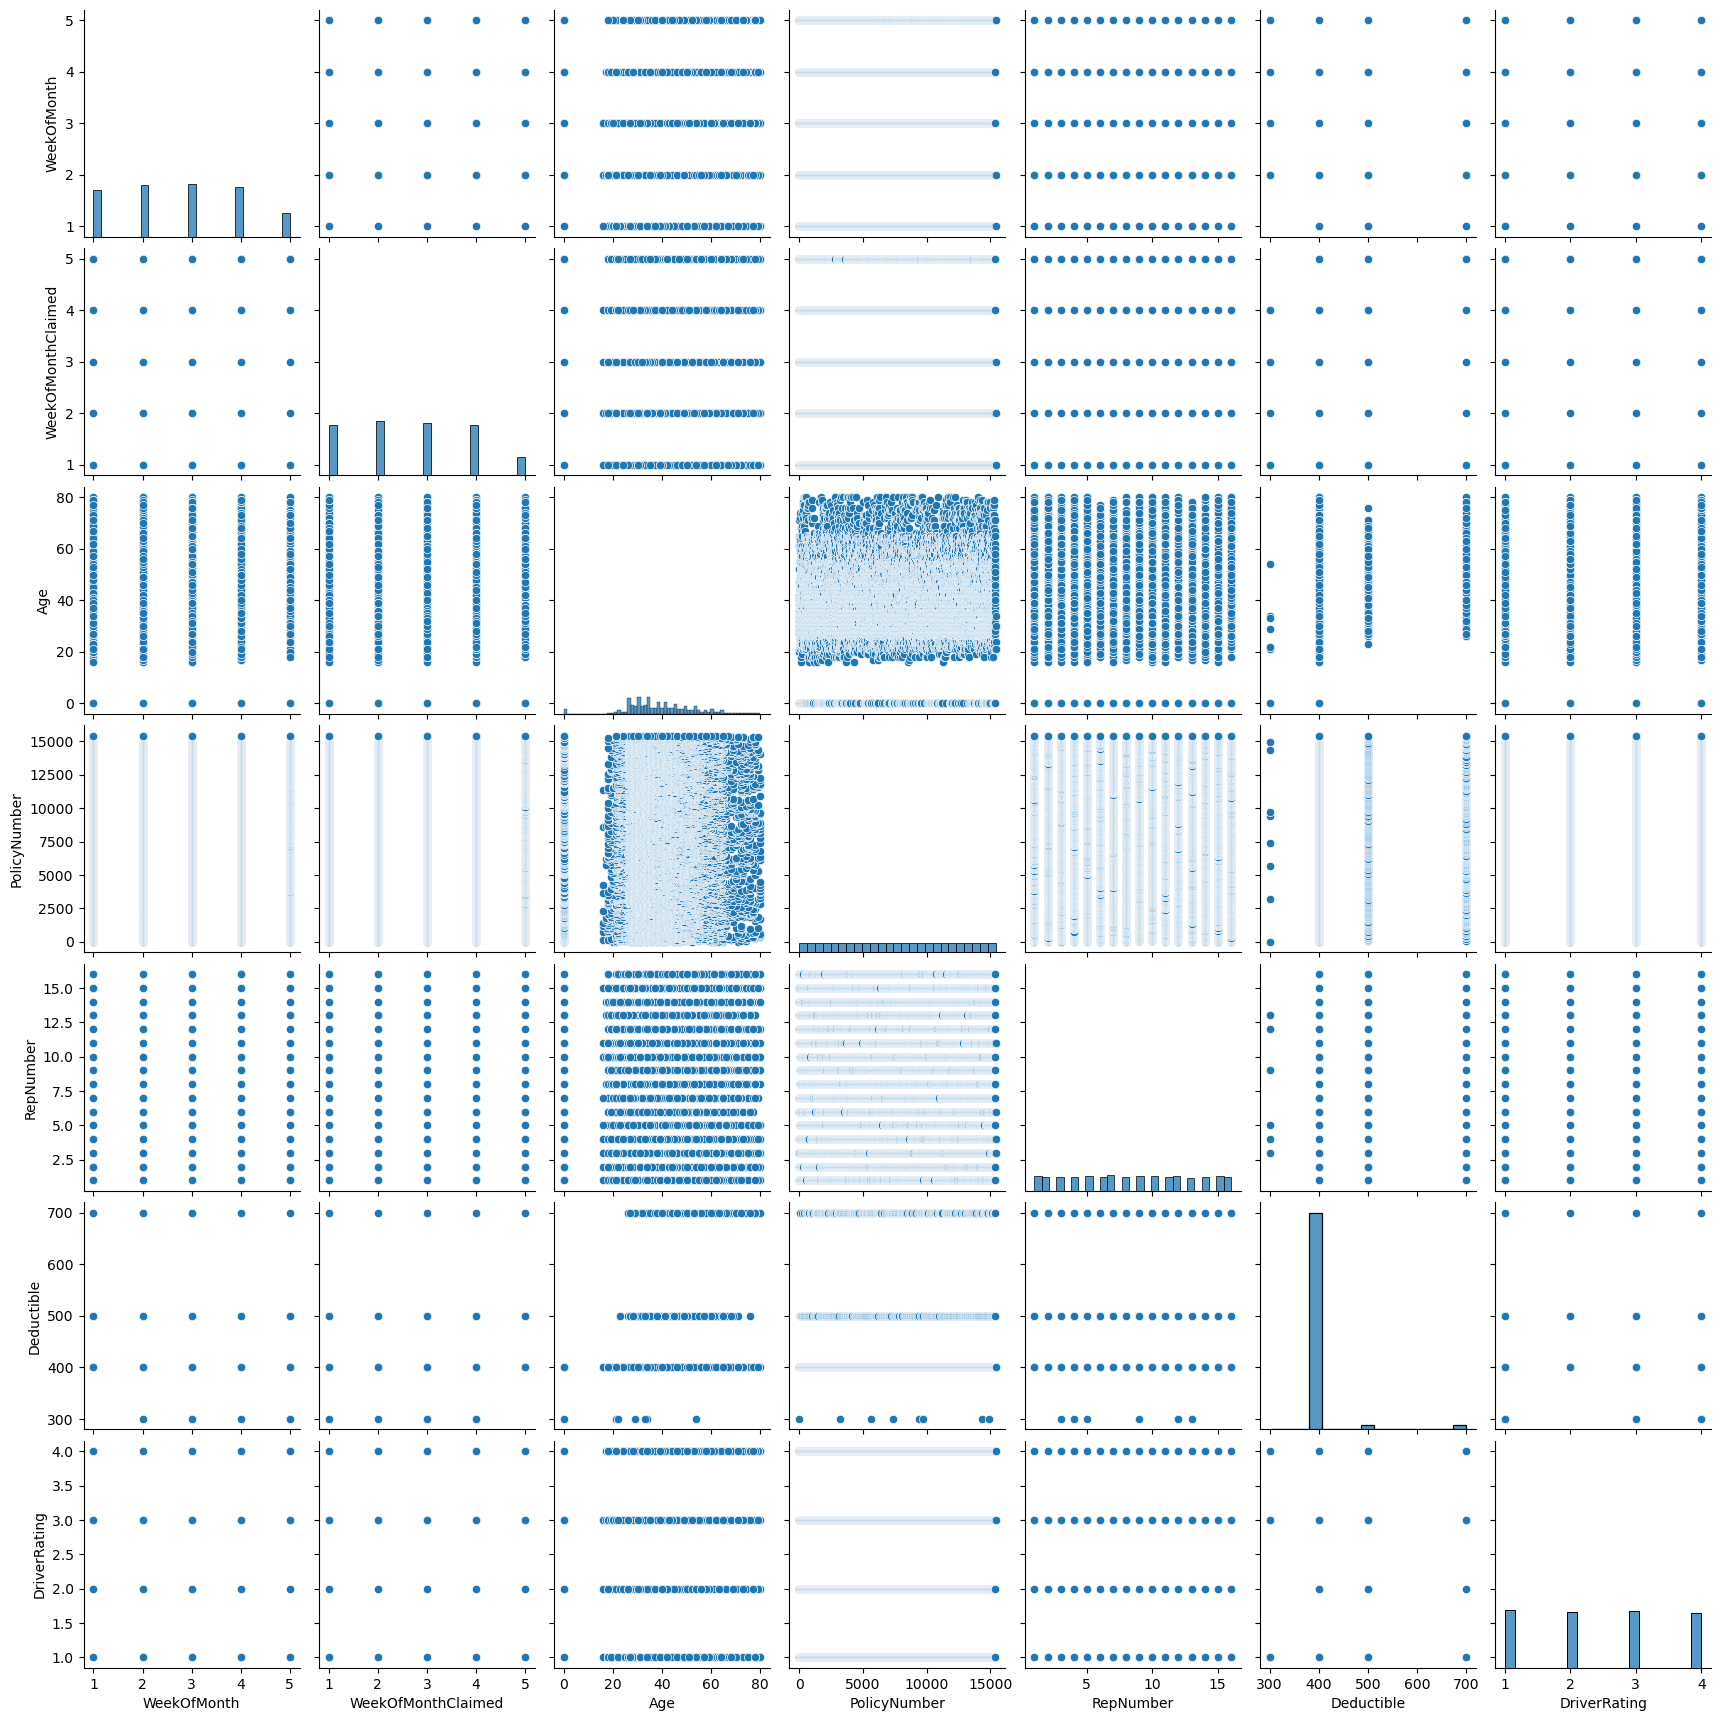

In [136]:
# Scatter plots and correlation matrix for numerical variables
sns.pairplot(df[num_cols])
plt.show()

**The pair plot provides a comprehensive visual overview of the relationships between various numerical features in the dataset. One noticeable aspect is the distinct clustering of values for Deductible, which appears to have specific discrete levels rather than a continuous distribution. This indicates that deductible amounts are set at predetermined values, which is typical in insurance policies. Additionally, PolicyNumber shows a clear sequential pattern, which is expected as policy numbers increase over time. These patterns suggest that while some features have inherent discrete or sequential nature, others like Age and DriverRating show more continuous variation, providing a mix of data types that can be useful for different modeling approaches.**

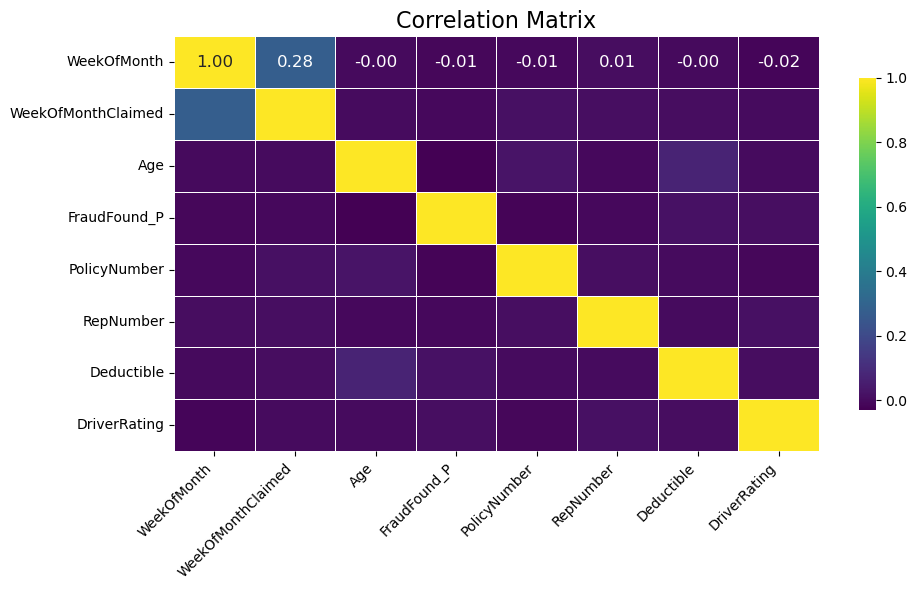

In [163]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap with a different color palette
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={"size": 12})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**The correlation matrix highlights the relationships between various numerical features in the dataset, using color coding to represent the strength and direction of these correlations. The most notable correlation is between WeekOfMonth and WeekOfMonthClaimed with a coefficient of 0.28, indicating a moderate positive relationship. This suggests that the week in which a claim is made is somewhat related to the week of the month the accident occurred. Other features show very weak or negligible correlations, indicating limited direct linear relationships between them and the target variable FraudFound_P. This visualization helps in identifying potential features that may interact with each other, which is essential for building more complex predictive models.**

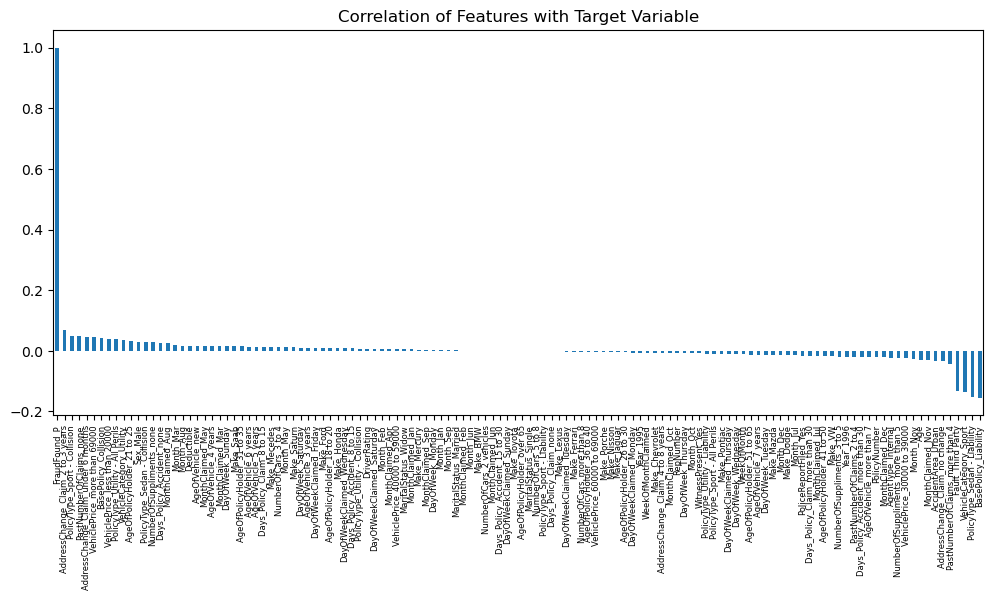

In [151]:
# Correlation with Target Variable
corr_with_target = df_encoded.corrwith(df_encoded['FraudFound_P'], numeric_only=True)
plt.figure(figsize=(12, 5))
corr_with_target.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Target Variable')
plt.xticks(fontsize=6)
plt.show()

**The bar chart illustrates the correlation of various features with the target variable, indicating the strength and direction of the relationship. A notable observation is the high positive correlation of FraudFound_P with itself (as expected, correlation with itself is 1). Among the other features, no individual variable exhibits a very strong correlation with the target, implying that a combination of multiple features might be necessary for effective fraud detection. Interestingly, features such as BasePolicy_Liability and VehicleCategory_Sport show a slight negative correlation, whereas features like AddressChange_Claim_2 to 3 years show a positive correlation, hinting at possible patterns in policyholder behavior and vehicle characteristics that could be influential in detecting fraudulent claims.**

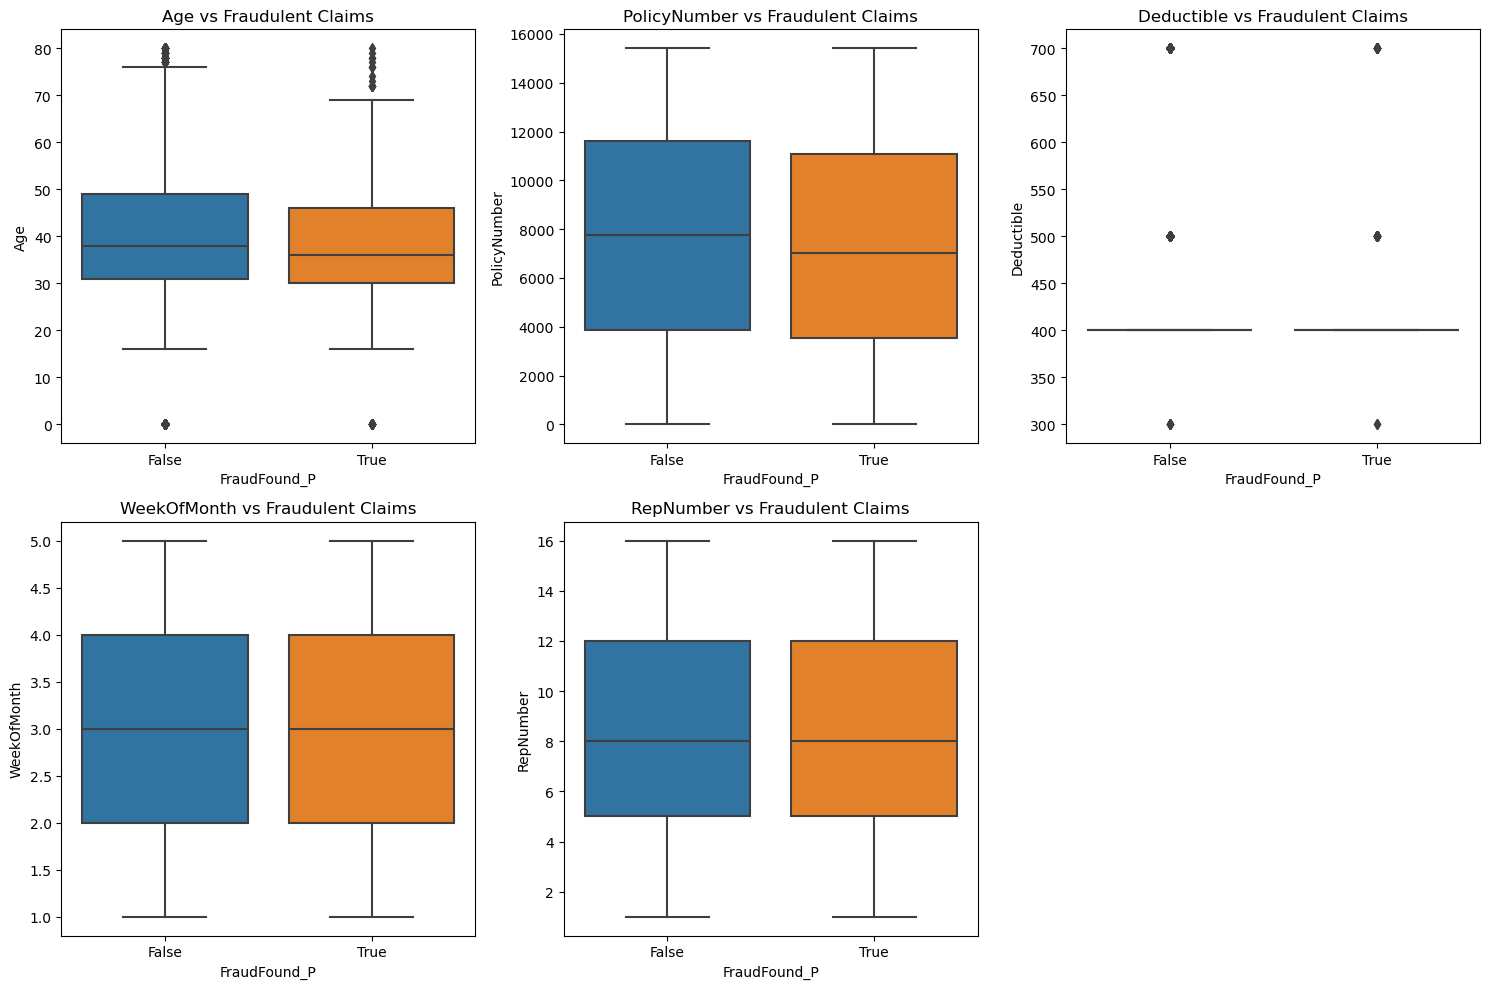

In [139]:
# Boxplots for top correlated features with the target
top_corr_features = corr_with_target.abs().sort_values(ascending=False).index[1:6]  # top 5 features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='FraudFound_P', y=feature, data=df)
    plt.title(f'{feature} vs Fraudulent Claims')
plt.tight_layout()
plt.show()

**The box plots reveal that while most features show overlapping distributions between fraudulent and non-fraudulent claims, one unique pattern stands out: the deductible amounts. Specifically, the deductible values for fraudulent claims are clustered around specific amounts (300, 400, 500, and 700), with distinct outliers. This clustering is not observed in non-fraudulent claims, suggesting that certain deductible amounts might be more frequently associated with fraud. This unique pattern in deductibles highlights the potential for using this feature as a key indicator in detecting fraudulent insurance claims.**

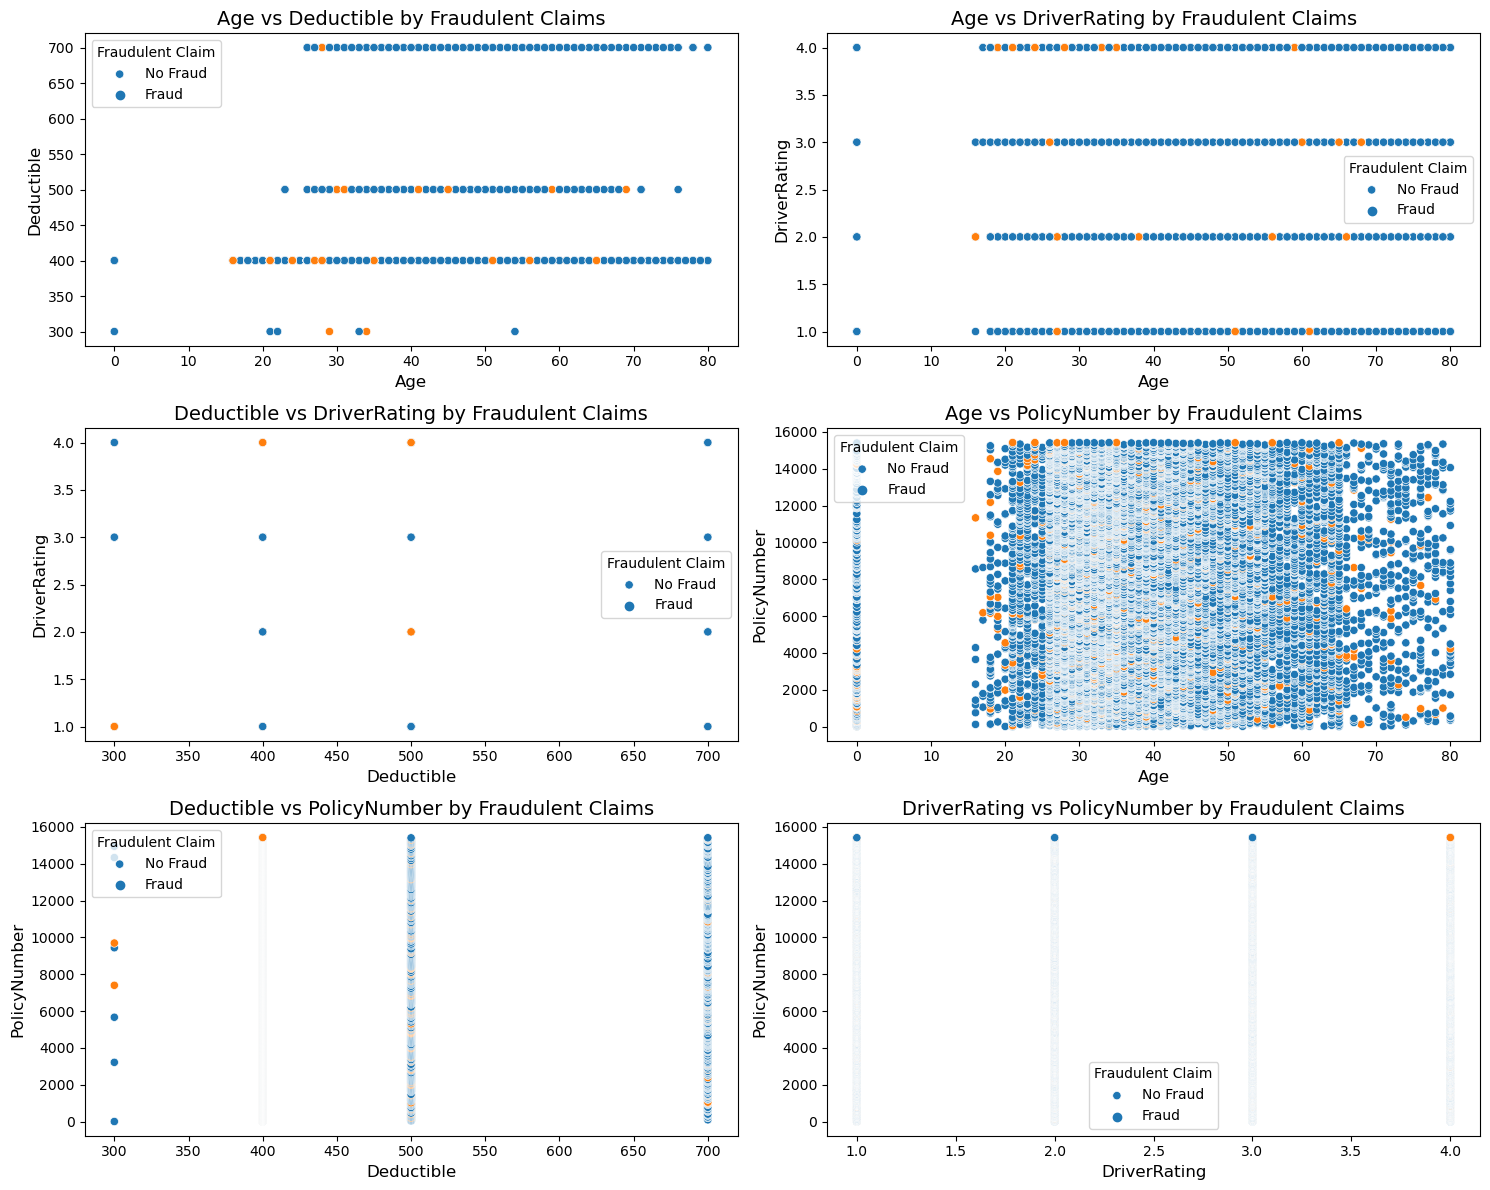

In [140]:
# Scatter plots for various combinations of numerical variables
numerical_combinations = [
    ('Age', 'Deductible'),
    ('Age', 'DriverRating'),
    ('Deductible', 'DriverRating'),
    ('Age', 'PolicyNumber'), 
    ('Deductible', 'PolicyNumber'),
    ('DriverRating', 'PolicyNumber')
]

plt.figure(figsize=(15, 12))
for i, (x, y) in enumerate(numerical_combinations, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=x, y=y, hue='FraudFound_P', data=df)
    plt.title(f'{x} vs {y} by Fraudulent Claims', fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(title='Fraudulent Claim', labels=['No Fraud', 'Fraud'])
plt.tight_layout()
plt.figtext(0.5, 0.01, '', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

**The scatter plots illustrate the relationships between pairs of numerical variables with data points colored by fraudulent (blue) and non-fraudulent (orange) claims. In the 'Age vs. Deductible' plot, fraudulent claims are more frequent at lower deductible values, particularly around 300, and are spread across different age groups. The 'Age vs. DriverRating' plot shows no clear pattern, indicating that age and driver rating do not significantly correlate with fraud. The 'Deductible vs. DriverRating' plot confirms that lower deductible values are associated with fraudulent claims, but driver ratings do not show a distinct pattern. The 'Age vs. PolicyNumber' plot displays a dense and overlapping distribution, suggesting no clear relationship with fraud. In the 'Deductible vs. PolicyNumber' plot, fraudulent claims cluster at specific deductible values (e.g., 300 and 500). Lastly, the 'DriverRating vs. PolicyNumber' plot indicates that fraudulent claims are spread across different policy numbers and driver ratings, without a discernible trend. Overall, lower deductible values stand out as a significant factor associated with fraudulent claims, while other variables show less clear patterns.**

### Multivariate Analysis

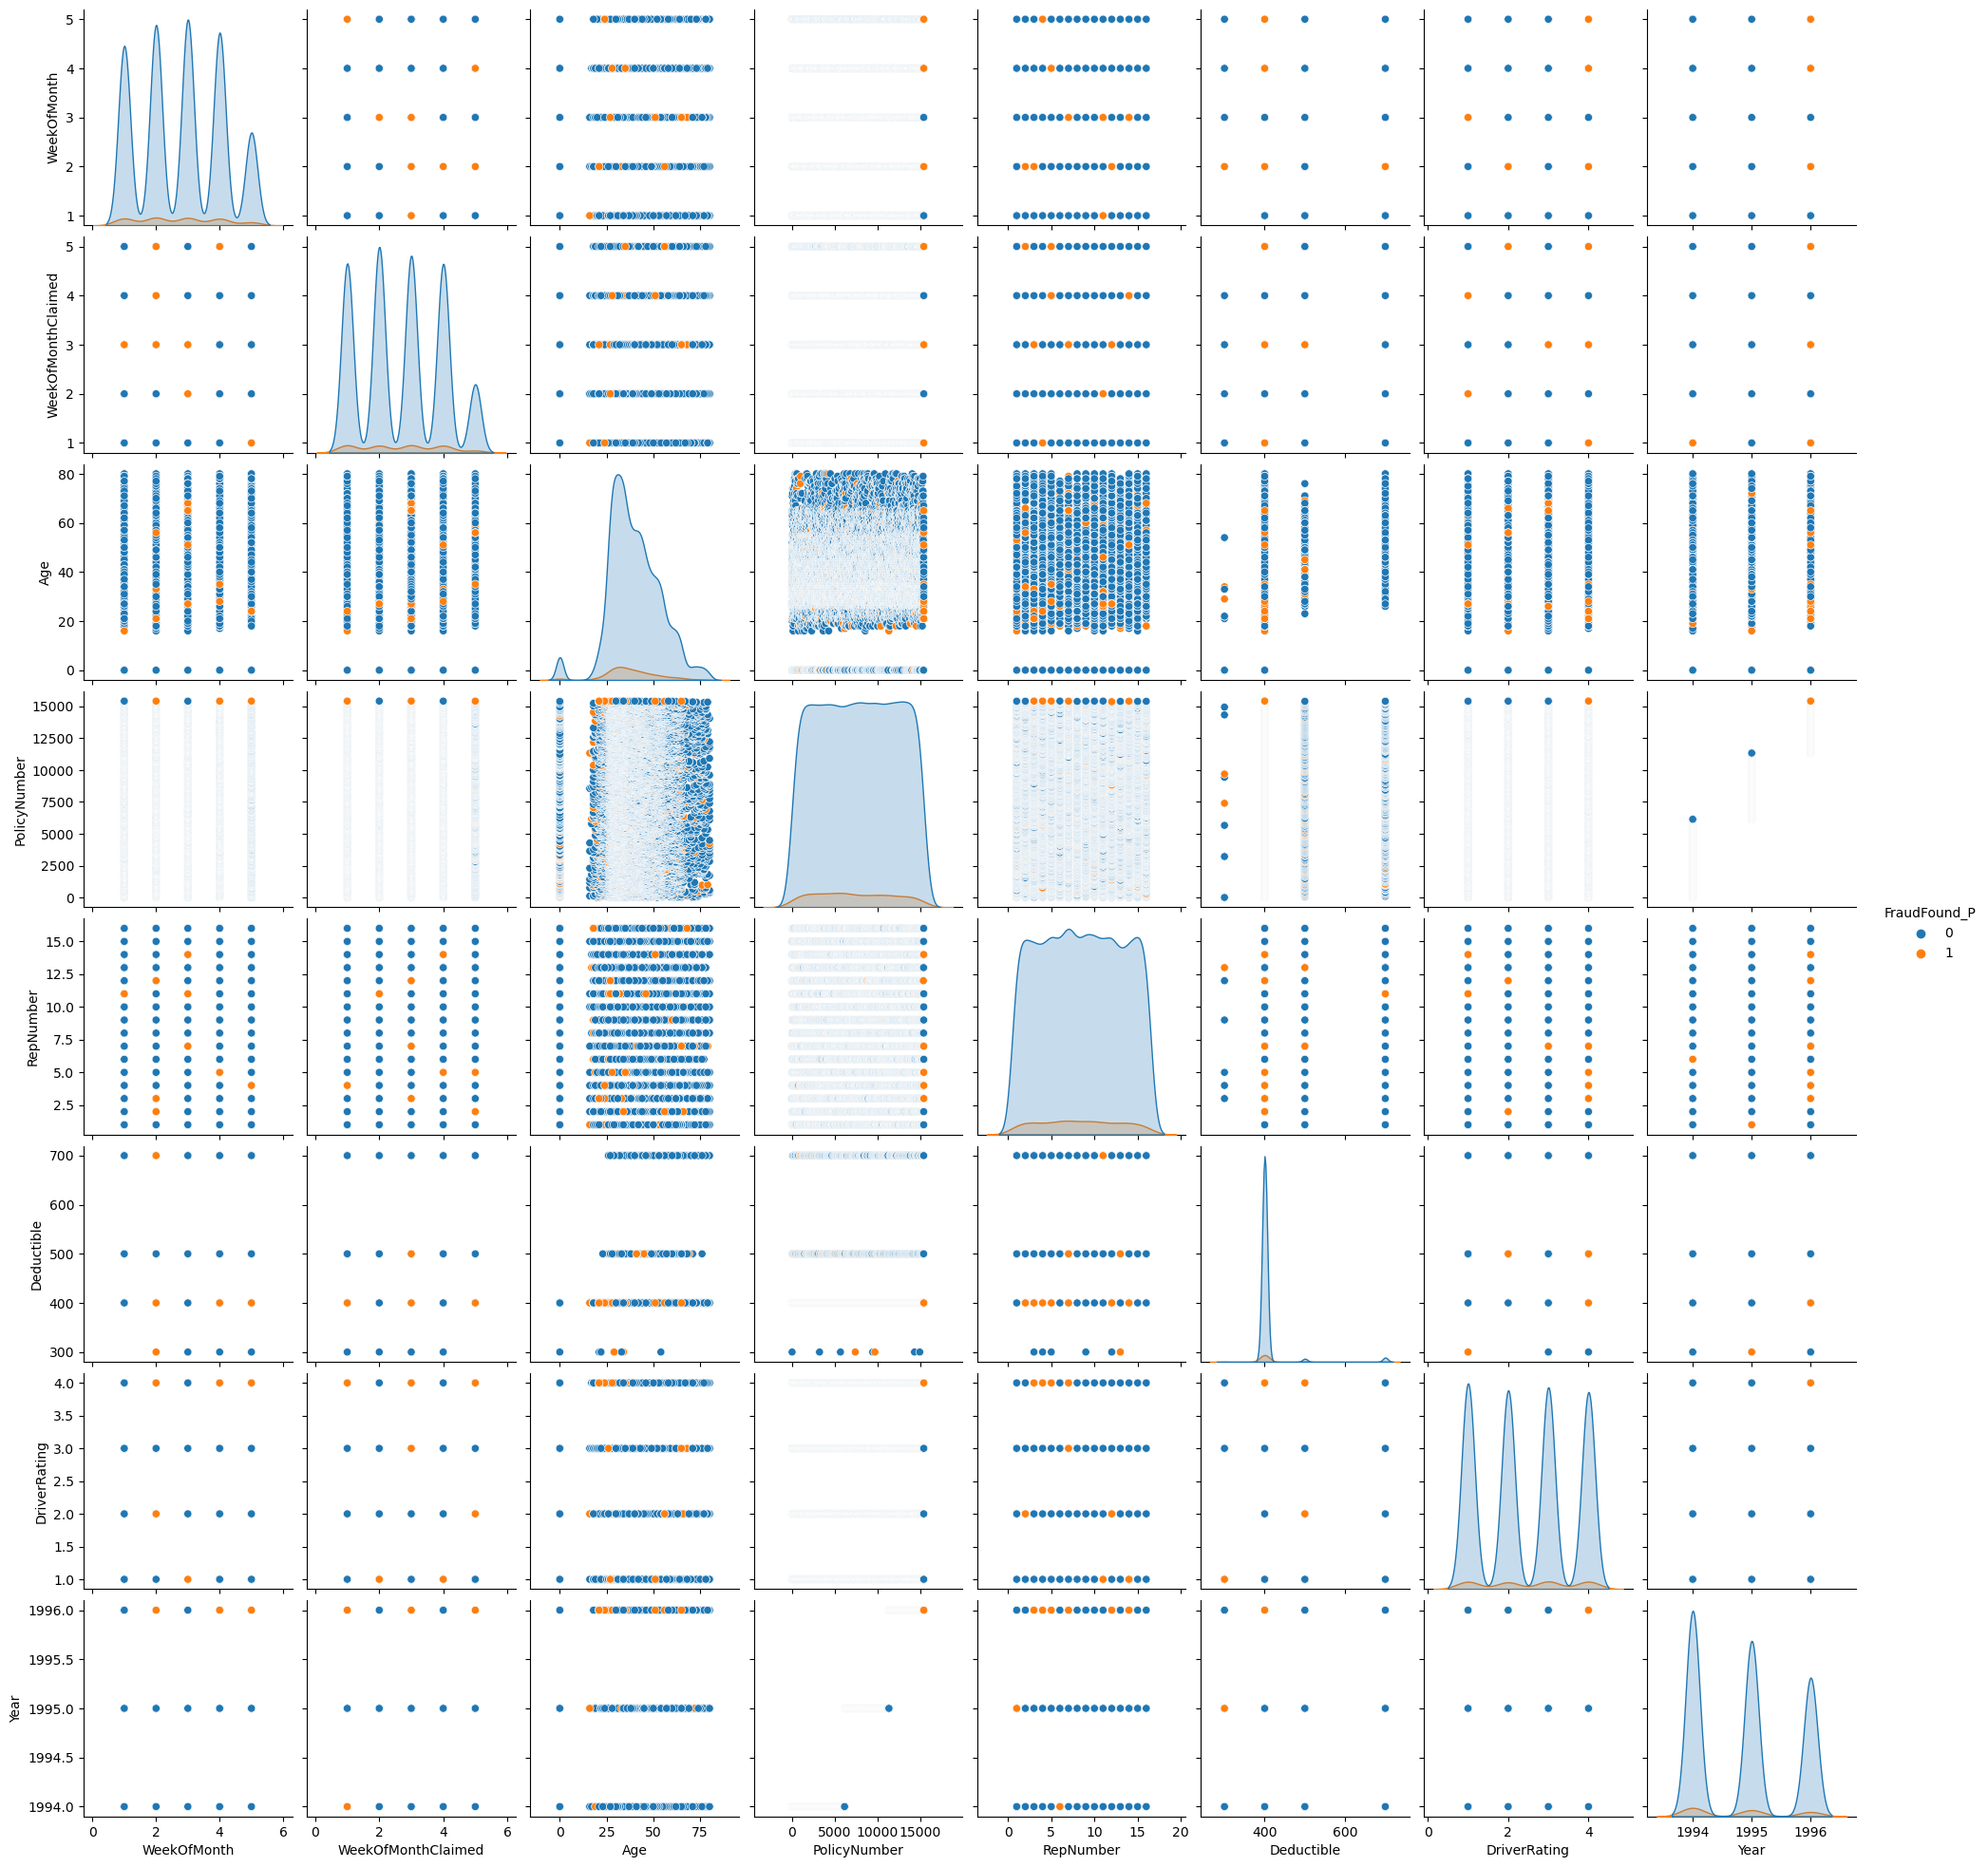

In [95]:
# Pair plots for numerical variables
sns.pairplot(df, hue='FraudFound_P')
plt.show()

**The pair plot visualizes the relationships between numerical variables in the dataset, with the data points colored by whether a claim was fraudulent (orange) or not (blue). Notably, the distribution and scatter plots reveal that 'Deductible' has a clear distinction, with fraudulent claims appearing predominantly at the lower deductible values, especially around the 300 mark. Additionally, 'PolicyNumber' shows a sequential increase, but does not display any noticeable patterns in relation to fraud. The 'Age' variable shows a diverse range of values for both fraudulent and non-fraudulent claims, without a clear separation. The scatter plots between other numerical variables, such as 'Age' vs. 'PolicyNumber' and 'RepNumber' vs. 'Deductible,' display dense clusters of overlapping points, indicating no strong linear relationships between these variables and fraudulent claims. This suggests that while some variables like 'Deductible' have distinct patterns, others require more complex interactions to identify fraud.**

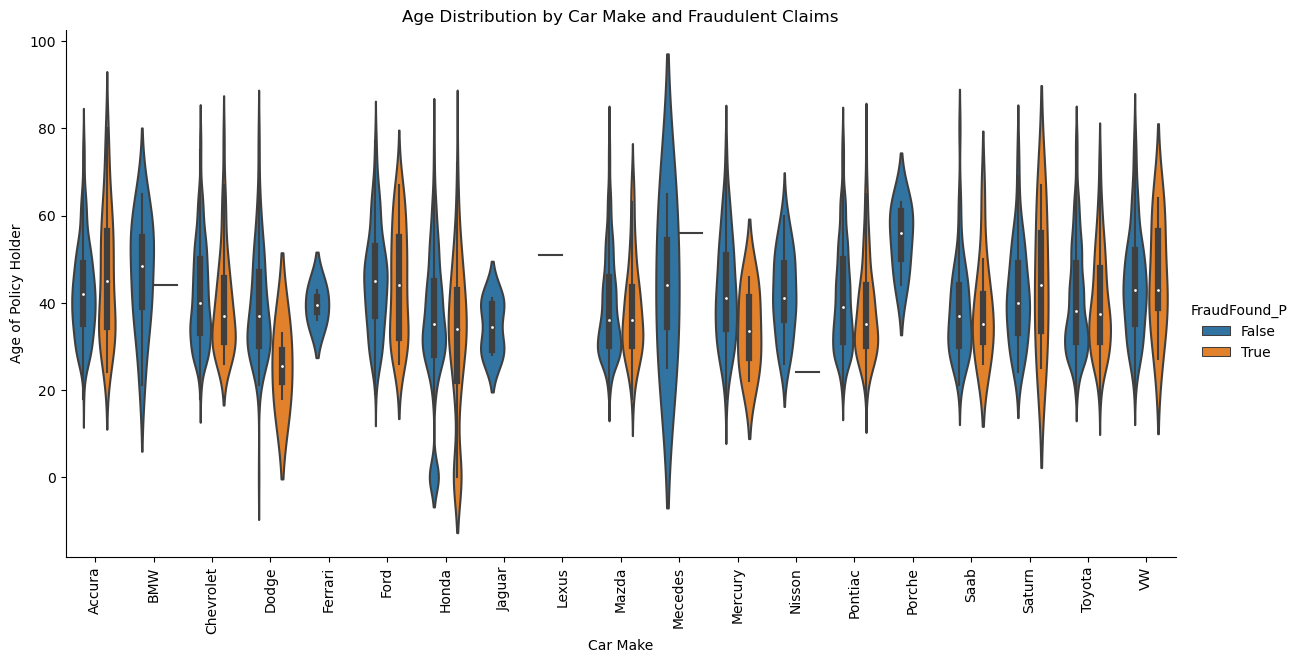

In [141]:
# Factor plots for categorical vs numerical
sns.catplot(x='Make', y='Age', hue='FraudFound_P', data=df, kind='violin', height=6, aspect=2)
plt.title('Age Distribution by Car Make and Fraudulent Claims')
plt.xlabel('Car Make')
plt.ylabel('Age of Policy Holder')
plt.xticks(rotation=90)
plt.show()

**The violin plot shows the age distribution of policyholders across various car makes, distinguishing between fraudulent (orange) and non-fraudulent (blue) claims. Each violin's width represents the density of ages, with the white dot indicating the median age, the thick black bar showing the interquartile range (IQR), and the thin lines representing the whiskers extending to 1.5 times the IQR. For some car makes, like BMW and Chevrolet, the age distributions of fraudulent and non-fraudulent claims are similar, suggesting age may not significantly impact fraud detection. However, car makes like Honda and Mazda exhibit more distinct differences between fraudulent and non-fraudulent age distributions, indicating potential age-related patterns in fraud detection. This plot highlights the need to consider multiple factors in detecting fraudulent claims and identifies car makes where age might be a more relevant factor.**

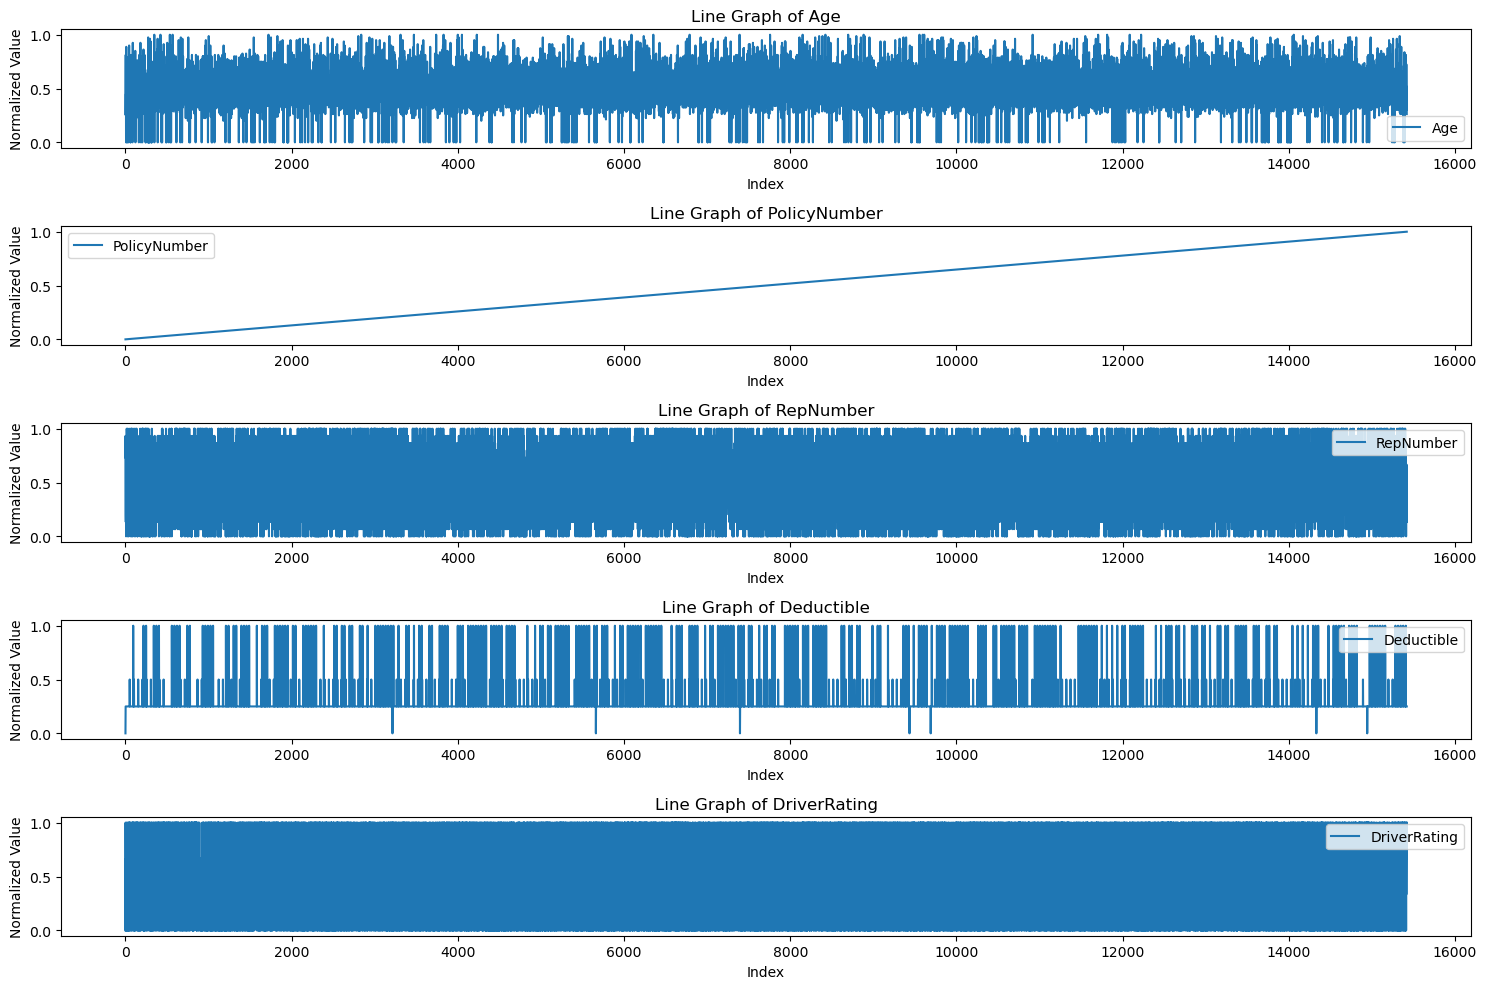

In [162]:
# List of numerical columns to plot
num_cols = ['Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating']

# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# Plot multivariate line plot using subplots for clarity
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    plt.plot(df.index, df_normalized[col], label=col)
    plt.title(f'Line Graph of {col}', fontsize=12)
    plt.xlabel('Index', fontsize=10)
    plt.ylabel('Normalized Value', fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()

**The 'Age' variable exhibits a high density of points, indicating a wide range of policyholder ages, making it difficult to discern specific age-related trends from the line plot. The 'PolicyNumber' variable shows a clear, linear upward trend, reflecting the sequential assignment of policy numbers in the dataset. The 'RepNumber' variable displays significant variability, suggesting a wide range of representation numbers without any discernible trend, indicative of diverse reporting patterns. The 'Deductible' variable shows substantial variability with numerous spikes, indicating varying deductible amounts across the dataset, reflecting a diverse range of policy agreements. The 'DriverRating' variable exhibits high variability, similar to 'RepNumber,' suggesting a broad spectrum of driver ratings among the policyholders, indicative of diverse risk profiles.**

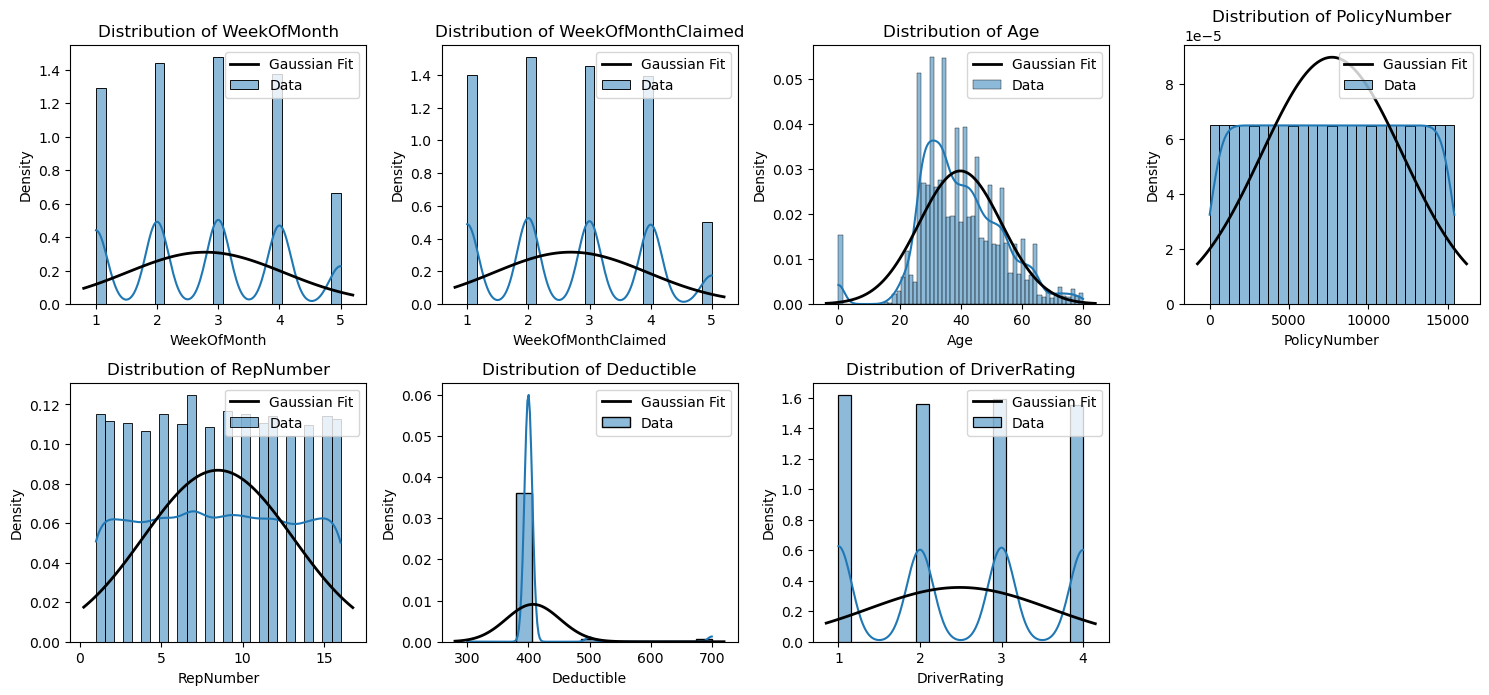

In [147]:
# Plot histograms with Gaussian fit
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, stat='density', label='Data')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[column].mean(), df[column].std())
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

**Each plot shows the distribution of a feature with a Gaussian (normal) curve overlayed. The closer the data follows the Gaussian fit, the more normally distributed it is.**

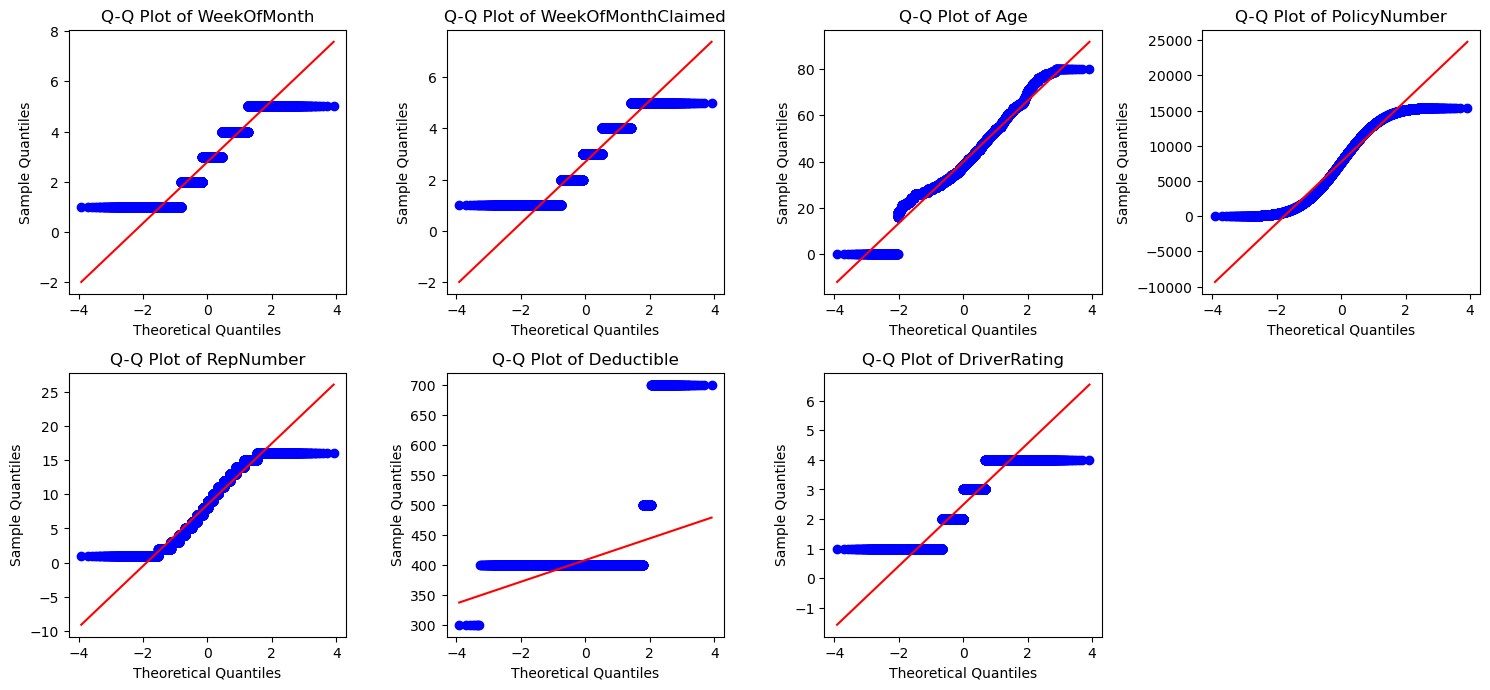

In [148]:
# Q-Q Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}', fontsize=12)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

**Q-Q plots compare the quantiles of the data to the quantiles of a normal distribution. If the data is normally distributed, the points will lie on the red line.**

### Target Variable Analysis

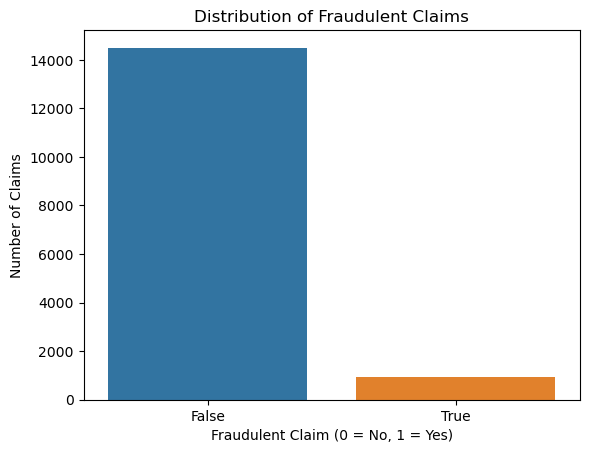

In [142]:
# Distribution of the target variable
sns.countplot(x='FraudFound_P', data=df)
plt.title('Distribution of Fraudulent Claims')
plt.xlabel('Fraudulent Claim (0 = No, 1 = Yes)')
plt.ylabel('Number of Claims')
plt.show()

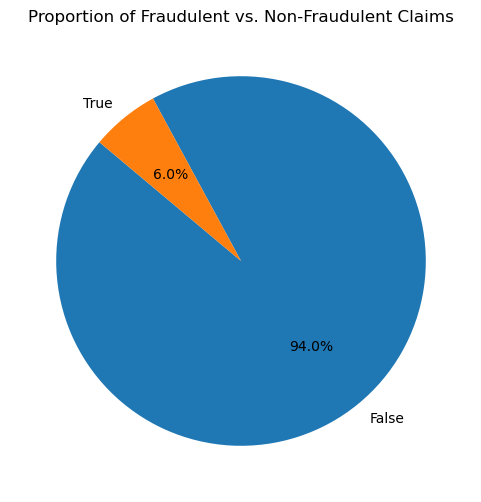

In [143]:
# Pie Plot for Fraud Distribution
fraud_counts = df['FraudFound_P'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Claims')
plt.show()

### Outlier Detection

In [167]:
# Statistical method for outlier detection
num_df = df.select_dtypes(include=['int64', 'float64'])
z_scores = np.abs((num_df - num_df.mean(numeric_only=True)) / num_df.std(numeric_only=True))
outliers = (z_scores > 3).sum()
print(f"\nOutliers detected in each numerical column:\n{outliers}")
print(df.shape)


Outliers detected in each numerical column:
WeekOfMonth             0
WeekOfMonthClaimed      0
Age                     0
PolicyNumber            0
RepNumber               0
Deductible            311
DriverRating            0
dtype: int64
(15420, 33)


In [168]:
# Define a function to remove outliers using z-score method
def remove_outliers(df, num_cols, z_threshold=3):
    num_df = df[num_cols]
    z_scores = np.abs((num_df - num_df.mean()) / num_df.std())
    outliers_mask = (z_scores <= z_threshold).all(axis=1)  # Rows without any outlier
    return df[outliers_mask]

# Apply outlier removal
df_cleaned = remove_outliers(df, num_cols)

# Check the shape of cleaned DataFrame
print("Shape after removing outliers:", df_cleaned.shape)

Shape after removing outliers: (15109, 33)


In [146]:
# Skewness and Kurtosis
print("\nSkewness of numerical features:")
print(df[num_cols].apply(skew))

print("\nKurtosis of numerical features:")
print(df[num_cols].apply(kurtosis))


Skewness of numerical features:
WeekOfMonth           0.115415
WeekOfMonthClaimed    0.158218
Age                   0.152299
PolicyNumber          0.000000
RepNumber             0.006627
Deductible            6.078212
DriverRating          0.009282
dtype: float64

Kurtosis of numerical features:
WeekOfMonth           -1.101189
WeekOfMonthClaimed    -1.085592
Age                    0.798018
PolicyNumber          -1.200000
RepNumber             -1.191879
Deductible            36.810449
DriverRating          -1.363233
dtype: float64


### Statistical Tests

In [149]:
# Chi-Square Test for Categorical Variables
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['FraudFound_P'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}:")
    print(f"Chi2 = {chi2:.4f}, p-value = {p:.4f}\n")

Chi-Square Test for Month:
Chi2 = 29.7964, p-value = 0.0017

Chi-Square Test for DayOfWeek:
Chi2 = 10.1506, p-value = 0.1185

Chi-Square Test for Make:
Chi2 = 59.8100, p-value = 0.0000

Chi-Square Test for AccidentArea:
Chi2 = 16.8443, p-value = 0.0000

Chi-Square Test for DayOfWeekClaimed:
Chi2 = 5.1596, p-value = 0.6405

Chi-Square Test for MonthClaimed:
Chi2 = 42.2667, p-value = 0.0000

Chi-Square Test for Sex:
Chi2 = 13.4899, p-value = 0.0002

Chi-Square Test for MaritalStatus:
Chi2 = 1.0135, p-value = 0.7980

Chi-Square Test for Fault:
Chi2 = 264.9538, p-value = 0.0000

Chi-Square Test for PolicyType:
Chi2 = 437.4019, p-value = 0.0000

Chi-Square Test for VehicleCategory:
Chi2 = 290.9421, p-value = 0.0000

Chi-Square Test for VehiclePrice:
Chi2 = 67.7683, p-value = 0.0000

Chi-Square Test for Days_Policy_Accident:
Chi2 = 11.5716, p-value = 0.0208

Chi-Square Test for Days_Policy_Claim:
Chi2 = 4.8812, p-value = 0.1807

Chi-Square Test for PastNumberOfClaims:
Chi2 = 53.5008, p-value

In [150]:
# T-Test for Numerical Variables
fraud = df[df['FraudFound_P'] == True]
non_fraud = df[df['FraudFound_P'] == False]
for col in num_cols:
    t_stat, p_val = ttest_ind(fraud[col], non_fraud[col])
    print(f"T-Test for {col}:")
    print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}\n")

T-Test for WeekOfMonth:
T-statistic = -1.4729, p-value = 0.1408

T-Test for WeekOfMonthClaimed:
T-statistic = -0.7154, p-value = 0.4744

T-Test for Age:
T-statistic = -3.6946, p-value = 0.0002

T-Test for PolicyNumber:
T-statistic = -2.5267, p-value = 0.0115

T-Test for RepNumber:
T-statistic = -0.9377, p-value = 0.3484

T-Test for Deductible:
T-statistic = 2.1544, p-value = 0.0312

T-Test for DriverRating:
T-statistic = 0.9023, p-value = 0.3669

